# Tugas 2

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
# Upload file spam.csv
# Membaca data
df = pd.read_csv('/content/drive/MyDrive/MachineLearning/spam.csv', encoding='latin-1')

# Melihat 5 baris awal
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [51]:
# Ambil kolom yang relevan
df = df[['v1', 'v2']]
df.columns = ['label', 'text']

# Encode label
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Cek distribusi kelas
print(df['label'].value_counts())

label
0    4825
1     747
Name: count, dtype: int64


In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42, stratify=df['label'])

=== Hasil dengan CountVectorizer ===
Akurasi: 0.9838565022421525

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.96      0.92      0.94       149

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



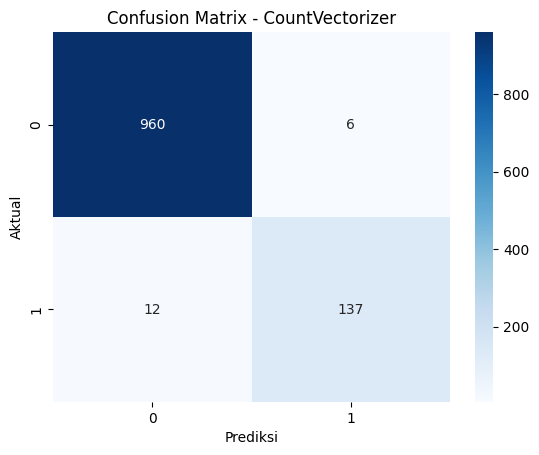

In [53]:
# Inisialisasi CountVectorizer
cv = CountVectorizer(stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

# Model Multinomial Naive Bayes
mnb_cv = MultinomialNB()
mnb_cv.fit(X_train_cv, y_train)

# Prediksi dan evaluasi
y_pred_cv = mnb_cv.predict(X_test_cv)
acc_cv = accuracy_score(y_test, y_pred_cv)

print("=== Hasil dengan CountVectorizer ===")
print("Akurasi:", acc_cv)
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred_cv))

# Confusion Matrix
cm_cv = confusion_matrix(y_test, y_pred_cv)
sns.heatmap(cm_cv, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - CountVectorizer')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

=== Hasil dengan TF-IDF Vectorizer ===
Akurasi: 0.968609865470852

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



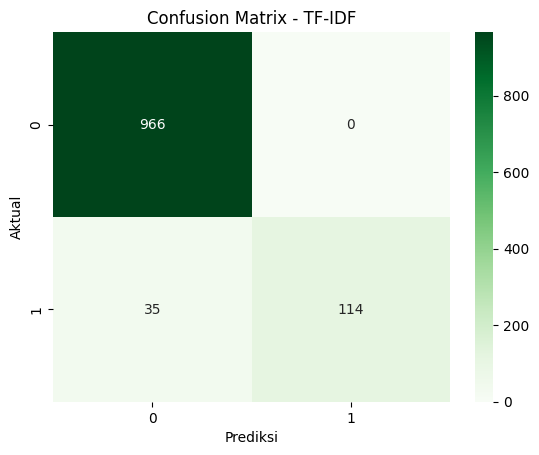

In [56]:
# Inisialisasi TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Model Multinomial Naive Bayes
mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(X_train_tfidf, y_train)

# Prediksi dan evaluasi
y_pred_tfidf = mnb_tfidf.predict(X_test_tfidf)
acc_tfidf = accuracy_score(y_test, y_pred_tfidf)

print("=== Hasil dengan TF-IDF Vectorizer ===")
print("Akurasi:", acc_tfidf)
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred_tfidf))

# Confusion Matrix
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - TF-IDF')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [57]:
print("=== Perbandingan Akurasi ===")
print(f"CountVectorizer : {acc_cv:.4f}")
print(f"TF-IDF Vectorizer: {acc_tfidf:.4f}")

if acc_tfidf > acc_cv:
    print("\nKesimpulan: TF-IDF memberikan hasil yang lebih baik, karena memperhitungkan pentingnya kata dalam keseluruhan korpus.")
else:
    print("\nKesimpulan: CountVectorizer memberikan hasil yang lebih baik, mungkin karena dataset kecil dan kata-kata sering berulang.")

=== Perbandingan Akurasi ===
CountVectorizer : 0.9839
TF-IDF Vectorizer: 0.9686

Kesimpulan: CountVectorizer memberikan hasil yang lebih baik, mungkin karena dataset kecil dan kata-kata sering berulang.
